In [1]:
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.visualization import plot_histogram
from qiskit import transpile


In [2]:
def oracle(n, s: int):
    qc = QuantumCircuit(n+1)
    for i in range(n):
        if s & 1<<i:
            qc.cx(i,n)

    return qc

def pre_oracle(n: int):
    qc = QuantumCircuit(n+1)
    qc.x(n)
    for qb in range(n+1):
        qc.h(qb)
    return qc

def post_oracle(n: int):
    qc = QuantumCircuit(n+1,n)
    qc.add_bits
    for qb in range(n):
        qc.h(qb)
    # qc.x(n)
    qc.measure(range(n),range(n))
    return qc



In [3]:
def bernstein_vazirani_circuit(n, s: int):
    oracle_qc = oracle(n,s)
    oracle_qc.label="oracle"
    oracle_qc.barrier()
    pre_qc = pre_oracle(n)
    pre_qc.barrier()
    post_qc = post_oracle(n)
    return pre_qc.compose(oracle_qc.compose(post_qc, oracle_qc.qubits), oracle_qc.qubits)


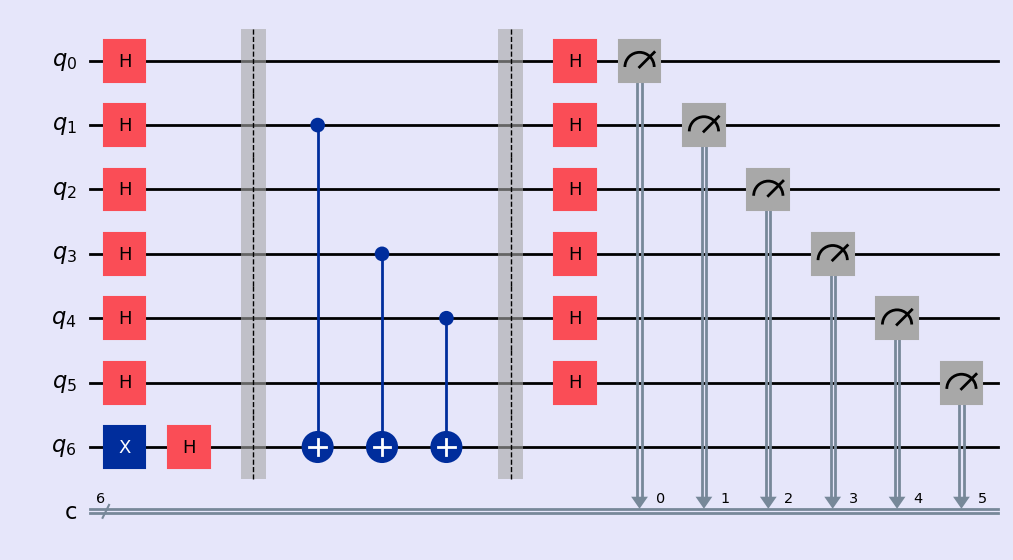

In [4]:
circuit = bernstein_vazirani_circuit(6,int('0b011010',2))
style = {'backgroundcolor': 'lavender'}
circuit.draw(output='mpl', style = style)

In [5]:
from qiskit_aer import StatevectorSimulator

# use local simulator
backend = StatevectorSimulator()
shots = 100
job = backend.run(circuits=circuit, shots=shots,memory=True)
result = job.result()
result.get_memory()[0]

'011010'

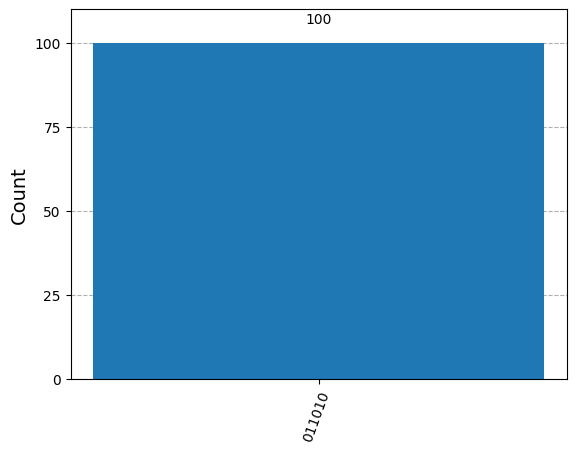

In [6]:
plot_histogram(result.get_counts(circuit))